In [1]:
import polars as pl
import matplotlib.pyplot as plt
import numpy as np
pl.Config.set_tbl_cols(100)

polars.config.Config

In [23]:
df = pl.read_csv("./dataset/clean_movies.csv")
df = df.with_columns(
    pl.col("Release Date").str.to_date()
)
df.head()

idx,Title,Movie Info,Year,Distributor,Budget (in $),Domestic Opening (in $),Domestic Sales (in $),International Sales (in $),World Wide Sales (in $),Release Date,Genre,Running Time,License
i64,str,str,i64,str,i64,i64,i64,i64,i64,date,str,i64,str
0,"""Avatar""","""A paraplegic Marine dispatched…",2009,"""Twentieth Century Fox""",237000000,77025481,785221649,2138484377,2923706026,2009-12-16,"""['Action', 'Adventure', 'Fanta…",162,"""PG-13"""
1,"""Avengers: Endgame""","""After the devastating events o…",2019,"""Walt Disney Studios Motion Pic…",356000000,357115007,858373000,1941066100,2799439100,2019-04-24,"""['Action', 'Adventure', 'Drama…",181,"""PG-13"""
2,"""Avatar: The Way of Water""","""Jake Sully lives with his newf…",2022,"""20th Century Studios""",null,134100226,684075767,1636174514,2320250281,2019-04-24,"""['Action', 'Adventure', 'Drama…",181,"""PG-13"""
3,"""Titanic""","""A seventeen-year-old aristocra…",1997,"""Paramount Pictures""",200000000,28638131,674292608,1590450697,2264743305,1997-12-19,"""['Drama', 'Romance']""",194,"""PG-13"""
4,"""Star Wars: Episode VII - The F…","""As a new threat to the galaxy …",2015,"""Walt Disney Studios Motion Pic…",245000000,247966675,936662225,1134647993,2071310218,2015-12-16,"""['Action', 'Adventure', 'Sci-F…",138,"""PG-13"""


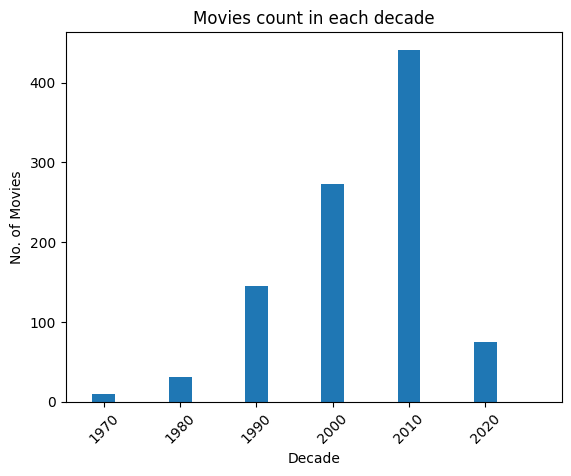

In [24]:
df2 = df.with_columns(
    ((pl.col("Year")) // 10 * 10).alias("Decade")
)
group_year = df2.group_by("Decade", maintain_order=True).agg(pl.col("Title").count()).sort(by="Decade", descending=False)

plt.bar(group_year["Decade"], group_year["Title"], width=3)
plt.xticks(np.arange(1970, group_year["Decade"].max() + 10, 10), rotation = 45) 
plt.xlim(1965, 2030)
plt.xlabel("Decade")
plt.ylabel("No. of Movies")
plt.title("Movies count in each decade")
plt.show()

In [29]:
#Highest Budget 

df.filter(
    pl.col("Budget (in $)") == pl.col("Budget (in $)").max()
)

idx,Title,Movie Info,Year,Distributor,Budget (in $),Domestic Opening (in $),Domestic Sales (in $),International Sales (in $),World Wide Sales (in $),Release Date,Genre,Running Time,License
i64,str,str,i64,str,i64,i64,i64,i64,i64,date,str,i64,str
1,"""Avengers: Endgame""","""After the devastating events o…",2019,"""Walt Disney Studios Motion Pic…",356000000,357115007,858373000,1941066100,2799439100,2019-04-24,"""['Action', 'Adventure', 'Drama…",181,"""PG-13"""


In [30]:
#Highest Earning

df.filter(
    pl.col("World Wide Sales (in $)") == pl.col("World Wide Sales (in $)").max()
)

idx,Title,Movie Info,Year,Distributor,Budget (in $),Domestic Opening (in $),Domestic Sales (in $),International Sales (in $),World Wide Sales (in $),Release Date,Genre,Running Time,License
i64,str,str,i64,str,i64,i64,i64,i64,i64,date,str,i64,str
0,"""Avatar""","""A paraplegic Marine dispatched…",2009,"""Twentieth Century Fox""",237000000,77025481,785221649,2138484377,2923706026,2009-12-16,"""['Action', 'Adventure', 'Fanta…",162,"""PG-13"""


In [16]:
df.head()

idx,Title,Movie Info,Year,Distributor,Budget (in $),Domestic Opening (in $),Domestic Sales (in $),International Sales (in $),World Wide Sales (in $),Release Date,Genre,Running Time,License
i64,str,str,i64,str,i64,i64,i64,i64,i64,date,str,i64,str
0,"""Avatar""","""A paraplegic Marine dispatched…",2009,"""Twentieth Century Fox""",237000000,77025481,785221649,2138484377,2923706026,2009-12-16,"""['Action', 'Adventure', 'Fanta…",162,"""PG-13"""
1,"""Avengers: Endgame""","""After the devastating events o…",2019,"""Walt Disney Studios Motion Pic…",356000000,357115007,858373000,1941066100,2799439100,2019-04-24,"""['Action', 'Adventure', 'Drama…",181,"""PG-13"""
2,"""Avatar: The Way of Water""","""Jake Sully lives with his newf…",2022,"""20th Century Studios""",null,134100226,684075767,1636174514,2320250281,2019-04-24,"""['Action', 'Adventure', 'Drama…",181,"""PG-13"""
3,"""Titanic""","""A seventeen-year-old aristocra…",1997,"""Paramount Pictures""",200000000,28638131,674292608,1590450697,2264743305,1997-12-19,"""['Drama', 'Romance']""",194,"""PG-13"""
4,"""Star Wars: Episode VII - The F…","""As a new threat to the galaxy …",2015,"""Walt Disney Studios Motion Pic…",245000000,247966675,936662225,1134647993,2071310218,2015-12-16,"""['Action', 'Adventure', 'Sci-F…",138,"""PG-13"""


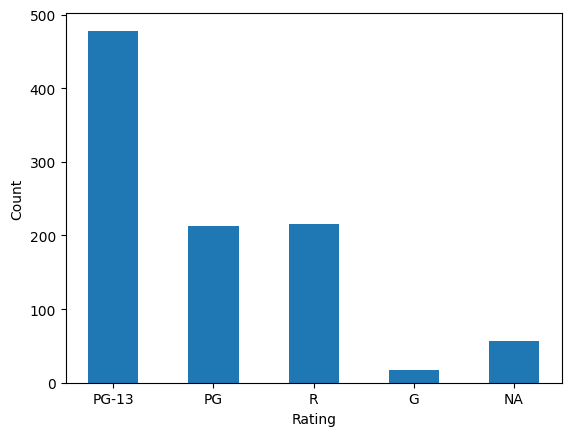

In [62]:
group_ratings = df.group_by("License", maintain_order=True).agg(pl.col("Title").count())

plt.bar(group_ratings["License"], group_ratings["Title"], width=0.5)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

In [69]:
df.sort(
    by="World Wide Sales (in $)", descending=True
)[0:5]

idx,Title,Movie Info,Year,Distributor,Budget (in $),Domestic Opening (in $),Domestic Sales (in $),International Sales (in $),World Wide Sales (in $),Release Date,Genre,Running Time,License
i64,str,str,i64,str,i64,i64,i64,i64,i64,date,str,i64,str
0,"""Avatar""","""A paraplegic Marine dispatched…",2009,"""Twentieth Century Fox""",237000000,77025481,785221649,2138484377,2923706026,2009-12-16,"""['Action', 'Adventure', 'Fanta…",162,"""PG-13"""
1,"""Avengers: Endgame""","""After the devastating events o…",2019,"""Walt Disney Studios Motion Pic…",356000000,357115007,858373000,1941066100,2799439100,2019-04-24,"""['Action', 'Adventure', 'Drama…",181,"""PG-13"""
2,"""Avatar: The Way of Water""","""Jake Sully lives with his newf…",2022,"""20th Century Studios""",null,134100226,684075767,1636174514,2320250281,2019-04-24,"""['Action', 'Adventure', 'Drama…",181,"""PG-13"""
3,"""Titanic""","""A seventeen-year-old aristocra…",1997,"""Paramount Pictures""",200000000,28638131,674292608,1590450697,2264743305,1997-12-19,"""['Drama', 'Romance']""",194,"""PG-13"""
4,"""Star Wars: Episode VII - The F…","""As a new threat to the galaxy …",2015,"""Walt Disney Studios Motion Pic…",245000000,247966675,936662225,1134647993,2071310218,2015-12-16,"""['Action', 'Adventure', 'Sci-F…",138,"""PG-13"""
